##Apple disease recognition model

1.Collect the data   

2.Become one with data(Data Preprocessing)

3.Create a baseline model

4.Data Augmentation to avoid overfitting

5.Repeat until satisified and finalize the model

6.Evaluate and visualize predictions

**Step1.** *Unzip the data from gdrive*

In [1]:
from zipfile import ZipFile
zip_ref=ZipFile("drive/MyDrive/Appl.zip")
zip_ref.extractall()
zip_ref.close()

***Importing all the required Libraries***

In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Step2.** *Become one with data*

To become one with the data and understand the data then ***Explore*** and ***Visualize*** the data form the data collected.

In [3]:
#How many directories and images are stored in Appl folder

for directory_path,directory_name,file_names in os.walk("Appl"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 3 directories and 1 images are in :Appl
There are 0 directories and 7 images are in :Appl/test
There are 4 directories and 0 images are in :Appl/train
There are 0 directories and 2008 images are in :Appl/train/Apple___healthy
There are 0 directories and 1987 images are in :Appl/train/Apple___Black_rot
There are 0 directories and 1760 images are in :Appl/train/Apple___Cedar_apple_rust
There are 0 directories and 2016 images are in :Appl/train/Apple___Apple_scab
There are 4 directories and 0 images are in :Appl/valid
There are 0 directories and 502 images are in :Appl/valid/Apple___healthy
There are 0 directories and 497 images are in :Appl/valid/Apple___Black_rot
There are 0 directories and 440 images are in :Appl/valid/Apple___Cedar_apple_rust
There are 0 directories and 504 images are in :Appl/valid/Apple___Apple_scab


In [4]:
def visualize_image(path,disease):
  rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
  image=mpimg.imread(os.path.join(path,disease,rand_img))
  plt.figure(figsize=(8,6))
  plt.imshow(image)
  print(image.shape)
  plt.gca().invert_yaxis()
  color="red"
  #Green text for healthy plant and red for diseased plant
  if(disease=="Apple___healthy"):color="green"
  plt.title(disease,fontsize=15,color=color)


(256, 256, 3)


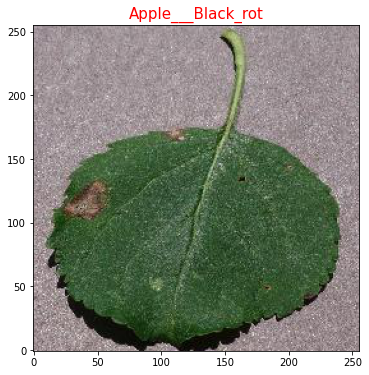

In [5]:
#This function is used to visualize random diseased and healthy leaf images from the Appl folder

Random_image=np.random.choice(os.listdir("Appl/train/"))
visualize_image("Appl/train/",Random_image)   #Passing the essential random params

Training data without *data augmentation*

In [6]:
# Normalization of our train and valid data to make computation faster

traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [7]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Appl/train",
                                            target_size=(256,256),
                                            class_mode="categorical",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Appl/valid",
                                         target_size=(256,256),
                                         class_mode="categorical",
                                         batch_size=32)

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


**Step3.** *Build a Baseline model with no data augmentation*

---

> Baseline model

**Tiny VGG architecture**

To create a basic CNN model using TensorFlow to
see the performance of it and change the model according to it.

This model is replicated form [CNN explainer website(*`Tiny VGG`*)](https://https://poloclub.github.io/cnn-explainer/)




In [8]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="softmax")
])

''' 
Here we use Categorical_crossentropy instead of SparseCategoricalCrossEntropy because the instance of ImageDataGenerator 
One-hot encodes the labels,Categorical_crossentropy only accepts the lables with one-hot encoded.
'''

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [9]:
#fit the model to out training data and check the validation accuracy

model1.fit(traindata,epochs=20,
           steps_per_epoch=len(traindata),
           validation_data=validdata,
           validation_steps=len(validdata))

Epoch 1/20
243/243 [==============================] - 36s 106ms/step - loss: 0.5102 - accuracy: 0.7893 - val_loss: 0.3076 - val_accuracy: 0.8842
Epoch 2/20
243/243 [==============================] - 23s 94ms/step - loss: 0.2618 - accuracy: 0.9050 - val_loss: 0.2236 - val_accuracy: 0.9249
Epoch 3/20
243/243 [==============================] - 23s 93ms/step - loss: 0.1614 - accuracy: 0.9445 - val_loss: 0.2272 - val_accuracy: 0.9135
Epoch 4/20
243/243 [==============================] - 23s 93ms/step - loss: 0.1335 - accuracy: 0.9541 - val_loss: 0.2155 - val_accuracy: 0.9305
Epoch 5/20
243/243 [==============================] - 22s 92ms/step - loss: 0.1006 - accuracy: 0.9638 - val_loss: 0.2426 - val_accuracy: 0.9254
Epoch 6/20
243/243 [==============================] - 24s 97ms/step - loss: 0.0630 - accuracy: 0.9797 - val_loss: 0.1868 - val_accuracy: 0.9388
Epoch 7/20
243/243 [==============================] - 23s 94ms/step - loss: 0.0541 - accuracy: 0.9817 - val_loss: 0.1448 - val_accuracy

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 10)       0         
 2D)                                                    

*Create a function to visualize the loss and accuracy curves of the train and valid data that we fit on the baseline model(`model1`)*

In [11]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)
  # plt.axis(False)

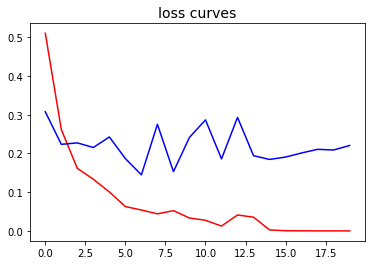

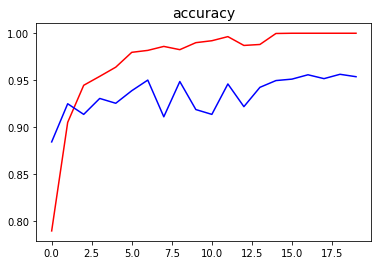

In [12]:
plot_loss_accuracy_curves(model1)

In [13]:
#Evaluate our model
model1.evaluate(validdata)

61/61 [==============================] - 4s 68ms/step - loss: 0.2206 - accuracy: 0.9537


[0.22064067423343658, 0.9536798596382141]

**Observation:**

---
*After some 15 epochs our validation loss increases a little bit so this means overfitting happens in our model but still out validation accuracy is not affected,lets try some other model architecture to
and data augmentation to reduce overfittinh problem*


**Repeat until satisified**

***Let's  apply VGG-16 and VGG-19 architectures doe our models to check whether it outperforms our `model1` that we built from scratch.***

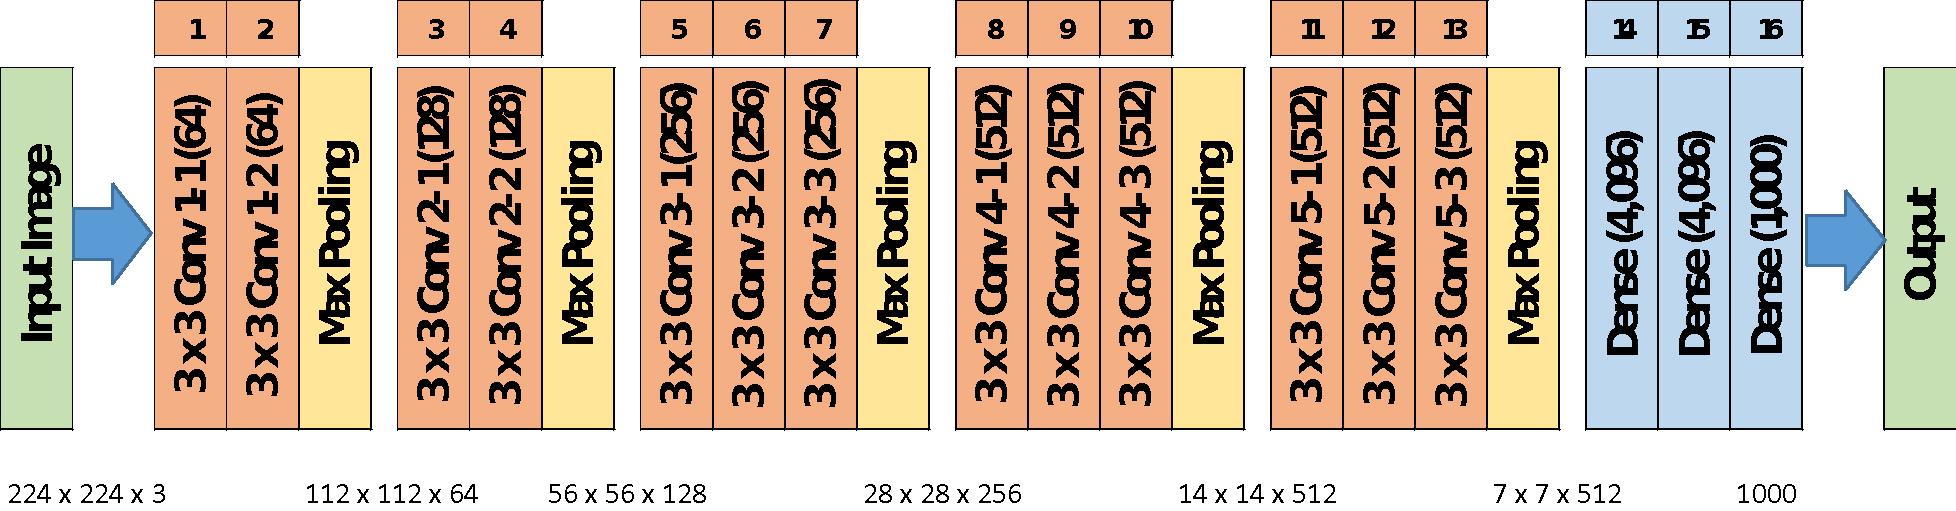

In [14]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(4,activation="softmax")

])

''' 
Here we use Categorical_crossentropy instead of SparseCategoricalCrossEntropy because the instance of ImageDataGenerator 
One-hot encodes the labels,Categorical_crossentropy only accepts the lables with one-hot encoded.
'''

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

In [16]:
model2.fit(traindata,steps_per_epoch=len(traindata),epochs=20,validation_data=validdata,validation_steps=len(validdata))

Epoch 1/20
243/243 [==============================] - 26s 101ms/step - loss: 0.8207 - accuracy: 0.6444 - val_loss: 0.4696 - val_accuracy: 0.8029
Epoch 2/20
243/243 [==============================] - 23s 95ms/step - loss: 0.3699 - accuracy: 0.8595 - val_loss: 0.2819 - val_accuracy: 0.8863
Epoch 3/20
243/243 [==============================] - 23s 96ms/step - loss: 0.2646 - accuracy: 0.9021 - val_loss: 0.2199 - val_accuracy: 0.9125
Epoch 4/20
243/243 [==============================] - 23s 95ms/step - loss: 0.1854 - accuracy: 0.9330 - val_loss: 0.2625 - val_accuracy: 0.9002
Epoch 5/20
243/243 [==============================] - 23s 95ms/step - loss: 0.1535 - accuracy: 0.9460 - val_loss: 0.1049 - val_accuracy: 0.9655
Epoch 6/20
243/243 [==============================] - 23s 95ms/step - loss: 0.0851 - accuracy: 0.9703 - val_loss: 0.0465 - val_accuracy: 0.9856
Epoch 7/20
243/243 [==============================] - 24s 99ms/step - loss: 0.1051 - accuracy: 0.9645 - val_loss: 0.1033 - val_accuracy

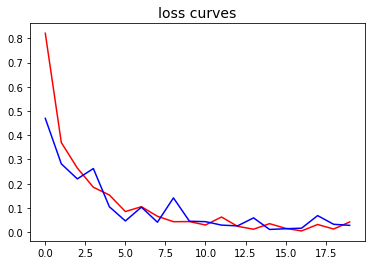

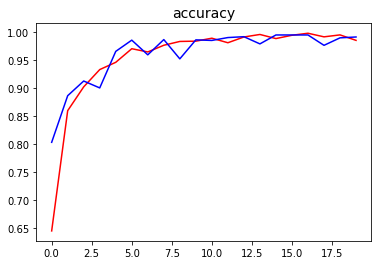

In [17]:
plot_loss_accuracy_curves(model2)

**Observation:**

---

Our VGG-16 model *`model2`* performs better than *`model1`* that is the tiny VGG architecture so as we see in the plot `val_los` and `val_accuracy` is more correlated with train loss and accuracy

**Step4.**
Create a model and name it* `model3`*  which'll be trained using augmented training data



In [18]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [19]:
train_aug_data=traindata_aug_gen.flow_from_directory('Appl/train',
                                                     target_size=(256,256),
                                                     class_mode="categorical",
                                                     batch_size=32)
valid_aug_data=traindata_aug_gen.flow_from_directory('Appl/valid',
                                                     target_size=(256,256),
                                                     class_mode="categorical",
                                                     batch_size=32)

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


In [20]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=valid_aug_data,
           validation_steps=len(valid_aug_data))

Epoch 1/20
243/243 [==============================] - 132s 542ms/step - loss: 1.0490 - accuracy: 0.5173 - val_loss: 0.8341 - val_accuracy: 0.6788
Epoch 2/20
243/243 [==============================] - 131s 540ms/step - loss: 0.5265 - accuracy: 0.7845 - val_loss: 0.3510 - val_accuracy: 0.8616
Epoch 3/20
243/243 [==============================] - 130s 533ms/step - loss: 0.2464 - accuracy: 0.9104 - val_loss: 0.2348 - val_accuracy: 0.9079
Epoch 4/20
243/243 [==============================] - 131s 540ms/step - loss: 0.1977 - accuracy: 0.9290 - val_loss: 0.2186 - val_accuracy: 0.9182
Epoch 5/20
243/243 [==============================] - 131s 539ms/step - loss: 0.1424 - accuracy: 0.9483 - val_loss: 0.1859 - val_accuracy: 0.9223
Epoch 6/20
243/243 [==============================] - 130s 536ms/step - loss: 0.1288 - accuracy: 0.9538 - val_loss: 0.1466 - val_accuracy: 0.9439
Epoch 7/20
243/243 [==============================] - 131s 539ms/step - loss: 0.0849 - accuracy: 0.9692 - val_loss: 0.0690 -

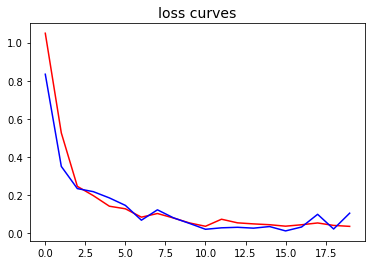

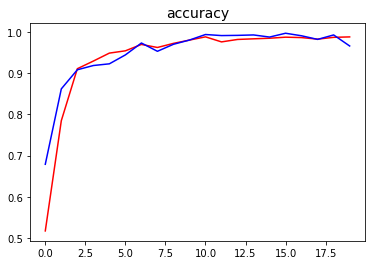

In [21]:
plot_loss_accuracy_curves(model3)

In [22]:
model3.evaluate(valid_aug_data)

61/61 [==============================] - 25s 411ms/step - loss: 0.1051 - accuracy: 0.9717


[0.10505527257919312, 0.9716932773590088]

In [23]:
#Evaluation of model2 on non augmented validation data
model2.evaluate(validdata)

61/61 [==============================] - 4s 71ms/step - loss: 0.0282 - accuracy: 0.9913


[0.028236502781510353, 0.9912506341934204]

In [24]:
#Evaluation of model3 on non augmented validation data

model3.evaluate(validdata)

61/61 [==============================] - 4s 70ms/step - loss: 0.1117 - accuracy: 0.9691


[0.11165833473205566, 0.9691199064254761]

**Observation:**

---
Same as `model2` the newly created model `model3` also gives a good accuracy

### Conclusion:
####As per the above experiments we have performed ***`model2`*** and ***`model3`*** outperforms and gives a good accuracy on both train and validation images

But on evaluating both the models on validation data *`model2(VGG-16)`* gives a good accuracy score than *`model3`* but the difference is very little so we select `model2` for our **PT1** project to train all the plant diseases

Saving our model to gdrive



In [25]:
model2.save("model2_ptpd_hdf.h5")
model3.save("model3.h5")

In [26]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [27]:
!ls model2_ptpd

ls: cannot access 'model2_ptpd': No such file or directory


In [28]:
# shutil.copy("/content/model2_ptpd_hdf.h5",'/gdrive/MyDrive')

# shutil.copy("/content/model3.h5",'/gdrive/MyDrive')

In [29]:
!ls /content/model2_ptpd/

ls: cannot access '/content/model2_ptpd/': No such file or directory


**Step6:**
Evaluate and Visualize the predictions

In [30]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [31]:
print(load_and_prep_data("/content/Appl/test/AppleScab1.JPG"))

tf.Tensor(
[[[[0.61960787 0.5764706  0.5921569 ]
   [0.62352943 0.5803922  0.59607846]
   [0.627451   0.58431375 0.6       ]
   ...
   [0.56078434 0.5058824  0.5019608 ]
   [0.54901963 0.49411765 0.49019608]
   [0.5411765  0.4862745  0.48235294]]

  [[0.62352943 0.5803922  0.59607846]
   [0.62352943 0.5803922  0.59607846]
   [0.62352943 0.5803922  0.59607846]
   ...
   [0.54509807 0.49019608 0.4862745 ]
   [0.5411765  0.4862745  0.48235294]
   [0.5372549  0.48235294 0.47843137]]

  [[0.627451   0.58431375 0.6       ]
   [0.62352943 0.5803922  0.59607846]
   [0.61960787 0.5764706  0.5921569 ]
   ...
   [0.54901963 0.49411765 0.49019608]
   [0.54901963 0.49411765 0.49019608]
   [0.5529412  0.49803922 0.49411765]]

  ...

  [[0.5882353  0.56078434 0.5882353 ]
   [0.58431375 0.5568628  0.58431375]
   [0.5764706  0.54901963 0.5764706 ]
   ...
   [0.36078432 0.32941177 0.31764707]
   [0.35686275 0.3254902  0.3137255 ]
   [0.3529412  0.32156864 0.30980393]]

  [[0.5764706  0.54901963 0.576470

In [32]:
class_names=list(traindata.class_indices.keys())

In [33]:
def predict_and_visualize(model):
  plt.figure(figsize=(12,16))
  for i,j in enumerate(os.listdir("/content/Appl/test")):
    plt.subplot(3,3,i+1)

    # call the preprocessing function load_and_prep_data() method to preprocess the image into tensors
    pro_image=load_and_prep_data(os.path.join("/content/Appl/test",j))
  
    #predict using given model
    pred=model.predict(pro_image)

    #get the index of the max probability that is returned from softmax activation function
    index=tf.argmax(pred[0])

    #calculate the confidence
    confidence=pred[0][index]*100

    #plot the image with title
    plt.imshow(tf.squeeze(pro_image))
    plt.title(class_names[index]+f"\n Confidence:{confidence:.2f}%",fontsize=13)
    plt.xlabel("True class: "+j,fontsize=12)

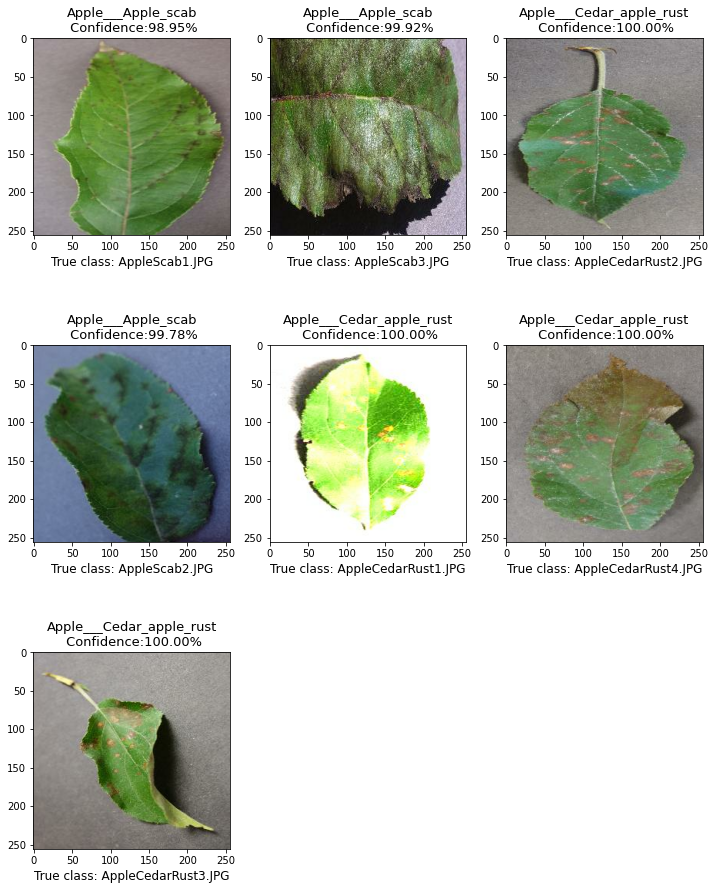

In [34]:
predict_and_visualize(model3)

###WOW!!!! 
All our custom prediction become are true.Checked on both `model2` and `model3` both gives 100% accurate preidction on the test images.

For further planr disease model let's use these two models to compare which fits good for the data and choose wisely between `model2` and `model3`.